# Where to Eat During NYC Restaurant Week

----------
## Part 1: Introduction

NYC Restaurant Week event has become so popular over the years. It is a three-week event that is held twice a year, usually late January to early February and again late July to early August. There are over 300 restaurants participating in this promotional event, which offer three-course lunch for \\$26 and three-course dinner for $42. People get the opportunity to eat in the best NYC restaurants or try Michelin-starred restaurants at a fixed price that are usually much more expensive.

In the past years, the minutes after the announcement of Restaurant Week’s dates, hundreds of people around the city start making reservations. People won’t get a table by simply walking in. The easiest way is to make online reservations through Open Table. OpenTable is an online restaurant-reservation service company. People can search dining experiences and make free restaurant reservations at more than 48,000 restaurants around the world. 

We don’t want to miss out on this money-saving opportunity. Since reservations for the most popular restaurants can go quickly, we'll do a research to narrow down the choices and focus on getting a table at those for the next Restaurant Week event. Our research questions for this project are:
- **1. Which restaurants are reservation-worthy during NYC Restaurant Week Event?**
- **2. Which factors affect the positive ratings on OpenTable?**



-------------
## Part 2: Data Summary



The dataset for this project is about NYC restaurant week 2018, and originally from OpenTable's website. It was downloaded from Kaggle: https://www.kaggle.com/popoandrew/restaurant-week-2018 .

Here is the introduction from the Kaggle webpage, "There are 348 restaurants and 22 variables, including Name, Address, Review Count, Phone, Average Review, Price Range, Star 1-5 (%), Restaurant Main Type, Latitude, and Longitude".

**Types of variables:**
- name: This is unique for each restaurant. Categorical variable.
- <u>street_address, google_map, phone, website, description:</u> Restaurant basic information. Categorical variables.
- <u>latitude, longitude, postal_code:</u> Restaurant location in NYC. Numerical variables.
- <u>review_count:</u> The total number of those who review the restaurant. Numerical variable.
- <u>price_range:</u> Three categories of the range of regular price. They are \\$31 to \\$50, \\$50 and over, \\$30 and under. Categorical variable.
- <u>restaurant_type:</u> The detailed types of restaurants. Will be ignored. Categorical variable.
- <u>restaurant_main_type:</u> The main types of restaurants. 17 categories of main types. Categorical variable.
- <u>average_review, food_review, service_review, ambience_review, value_review:</u> The range of rating value: 1-5. Numerical variables.
- <u>star_1, star_2, star_3, star_4, star_5:</u> Overall rating. star_1 is the lowest. star_5 is the highest. The sum of star_1, star_2, star_3, star_4, and star_5 is 100(%). The range of each value: 0-100%. Numerical variables.

**Create an output variable (Positive rating) based on Star Ratings:**

One of the purposes of this study is to identify the factors that affect the positive ratings on OpenTable. One Star is the lowest of overall rating. Five Stars show the highest overall rating. Variables Star_1-5 represent the percentage of each star that one restaurant has received. It would make sense to combine star_4 and star_5 ratings as the the positive rating to show customer's positive dining experiencce. In other words, customers assigning 4- or 5-star ratings are likely to have enjoyed most of the restaurants. 3-star ratings would be neutral. 1- and 2-star ratings would be negative. 


-------------------
## Part 3: Exploratory Data Analysis (EDA)

### 3.1 Import Libaries

In [2]:
%matplotlib notebook

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

###  3.2. Load data


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/susanqisun/DAV-5400/master/restaurant_week_2018_final.csv')

df.head(3) # the first three rows.

,name,street_address,google_map,review_count,phone,website,restaurant_type,average_review,food_review,service_review,...,star_1,star_2,star_3,star_4,star_5,description,restaurant_main_type,latitude,longitude,postal_code
0,Smoke Jazz and Supper Club,"2751 Broadway New York, NY 10025",//www.google.com/maps/search/?api=1&query=40.8...,2155,(212) 864-6662,http://www.smokejazz.com/,Contemporary American,4.42155,3.9,4.2,...,2,7,5,24,62,Smoke has augmented its reputation as one of M...,Contemporary American,40.801126,-73.968192,10025.0
1,Tavern on the Green,"1 Tavern on the Green New York, NY 10023",//www.google.com/maps/search/?api=1&query=40.7...,7029,(212) 877-8684,http://www.tavernonthegreen.com/,American,4.67029,4.4,4.4,...,1,2,6,19,72,Magical is a word thrown around a lot when dis...,American,40.772187,-73.977722,10023.0
2,ABC Kitchen,"35 East 18th Street New York, NY 10003",//www.google.com/maps/search/?api=1&query=40.7...,6031,(212) 475-5829,http://www.abckitchennyc.com/,Contemporary American,4.76031,4.6,4.4,...,1,2,5,15,77,ABC Kitchen with Jean-Georges: passionately co...,Contemporary American,40.737897,-73.989499,10003.0


### 3.3 Check shape of the datset


In [3]:
# Check shape of the datset
df.shape

(348, 23)

- The dataset contains **348 obeservations and 23 variables**.


### 3.4 Data Cleaning
Check missing values, data types, unique values, Zero values, count and ? values.

In [4]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
name,object,348,0,348,0,0
street_address,object,347,0,348,0,0
google_map,object,346,0,348,0,0
review_count,int64,328,0,348,0,0
phone,object,348,0,348,0,0
website,object,318,2,346,0,0
restaurant_type,object,48,0,348,0,0
average_review,float64,343,0,348,0,0
food_review,float64,12,0,348,0,0
service_review,float64,14,0,348,0,0


- The dataset contains 348 rows and 23 columns with 15 numerical and 9 categorical variables. 
- These are two missing values in 'website' variabe, and one missing in 'postal_code' variable. We'll not use these two variables in analyzing data. Therefore, it doesn't matter if We keep the rows with missing values. 
- Finally, the dataset is clean.


In [5]:
# Defination of star
df[['star_1','star_2','star_3','star_4','star_5']].head()


,star_1,star_2,star_3,star_4,star_5
0,2,7,5,24,62
1,1,2,6,19,72
2,1,2,5,15,77
3,3,2,6,15,74
4,1,3,9,27,60


- The  number in these 'star' variables represents percentage.
- It can be obviously seen that the sum of 'star_1','star_2','star_3','star_4', and 'star_5' is 100%.

### 3.5 Add/drop columns

- We have two variables that represent types of restaurants. The 'restaurant_type' variable is much more detailed so we don't need it for this study. We'll drop 'restaurant_type', and keep 'restaurant_main_type'.
- Four variables that will not be used in the analysis are removed from dataset.
- For the purpose of this study, one new dependent variable will be created and called 'positive_rating'.

In [4]:
# drop some variables from df.
df=df.drop(columns=['restaurant_type','average_review','latitude', 'longitude'], axis=1)

# add the new column 'positive_rating' to df.
df['positive_rating'] = df['star_4'] + df['star_5']

# check columns.
df.columns

Index(['name', 'street_address', 'google_map', 'review_count', 'phone',
       'website', 'food_review', 'service_review', 'ambience_review',
       'value_review', 'price_range', 'star_1', 'star_2', 'star_3', 'star_4',
       'star_5', 'description', 'restaurant_main_type', 'postal_code',
       'positive_rating'],
      dtype='object')

------------------------------------
### 3.6 Display Barplot for the price ranges


In [7]:
# Create a new variable 'price02' that includes 
# categories of variable 'price_range' only.
price02 = df['price_range'].value_counts()

<IPython.core.display.Javascript object>


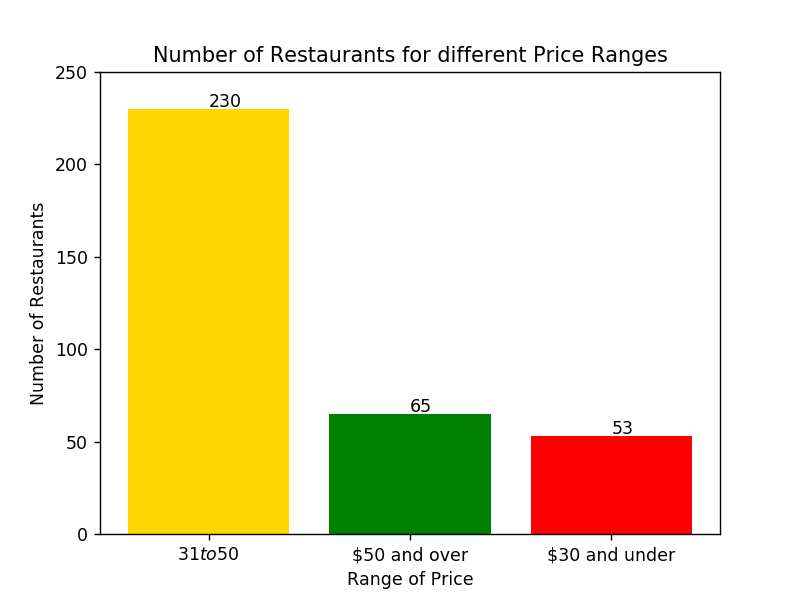

In [8]:
# Use Matplotlib

# define a new figure
plt.figure(1)

# Define bars and colors
plt.bar(price02.index, price02.values, color=['gold', 'green', 'red'])

# Define labels for x-axis and y-axis 
plt.xlabel('Range of Price')
plt.ylabel('Number of Restaurants')

# Define a title for the plot: gets displayed at the top
plt.title('Number of Restaurants for different Price Ranges')

# Set the y-axis limits  
plt.ylim(0,250)

# Add the total number to axes
for i in price02.index:
    plt.text(list(price02.index).index(i),price02[i]+1,price02[i])
    

<IPython.core.display.Javascript object>


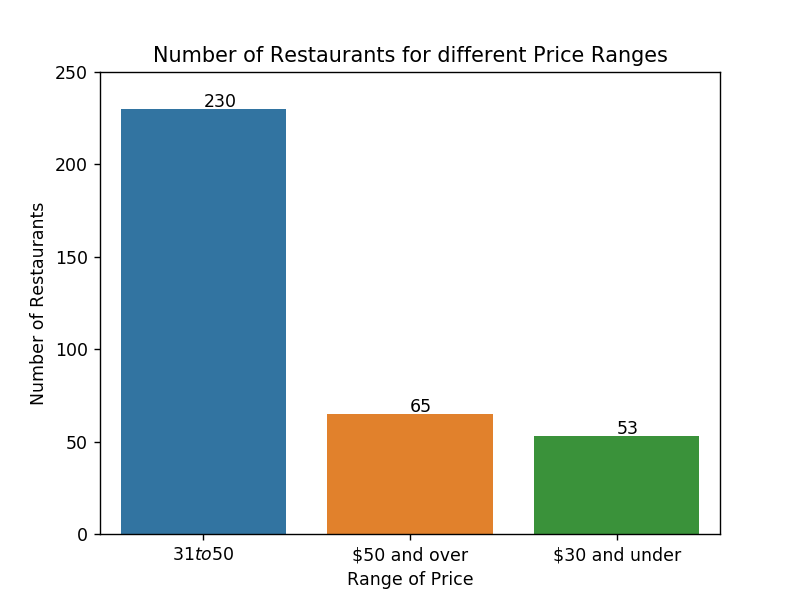

In [9]:
# Use Seaborn

# Define the type of plot
sns.barplot(price02.index, price02.values)

# Define labels for x-axis and y-axis 
plt.xlabel('Range of Price')
plt.ylabel('Number of Restaurants')

# Set the y-axis limits  
plt.ylim(0,250)

# Define a title for the plot: gets displayed at the top
plt.title('Number of Restaurants for different Price Ranges')

# Add the text =total number to the axes
for i in price02.index:
    plt.text(list(price02.index).index(i),price02[i]+1,price02[i])
    

**Results:**
- 1. There are 348 restaurants participating in NYC restaurant week event in 2018.  
- 2. Among them, it usually costs \\$31 to $50 per person to eat at 230 restaurants, \\$50 and over at 65 restaurants, and \\$30 and under at 53 restaurants.


---------------------------
### 3.7 Display Boxplots for Ratings on different aspects of Restaurants


<IPython.core.display.Javascript object>


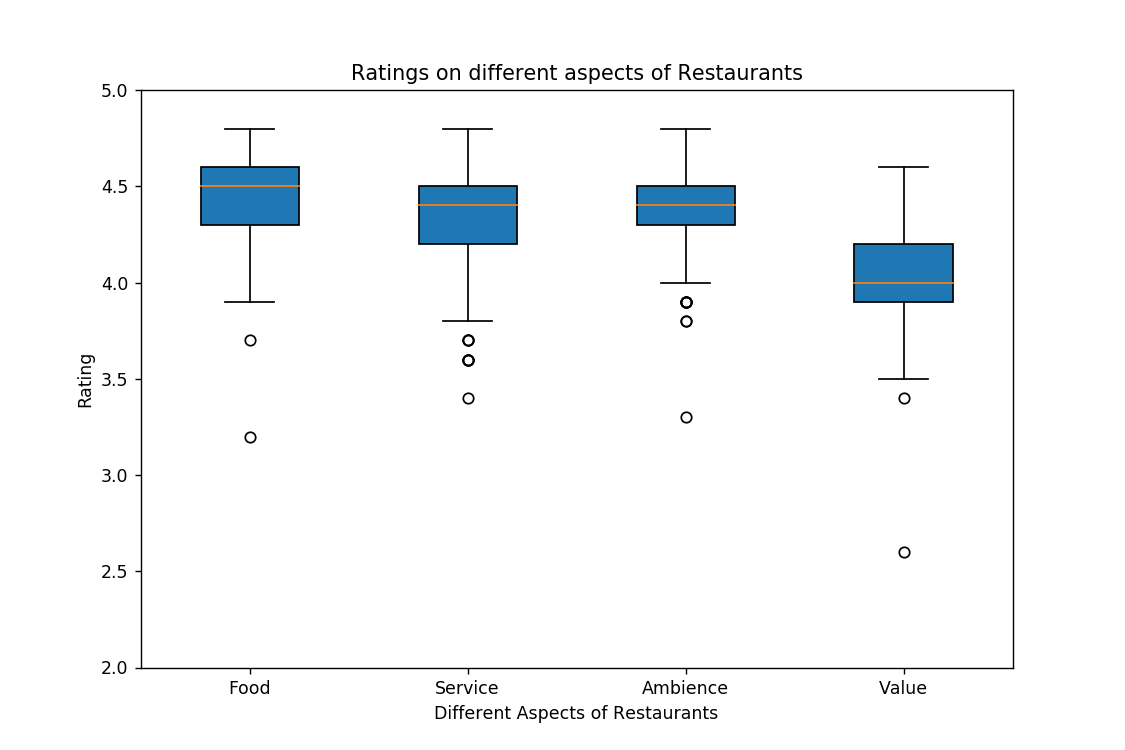

Text(0.5, 1.0, 'Ratings on different aspects of Restaurants')

In [10]:
# Use Matplotlib

# Generate data for the boxplots
food = df.loc[:,'food_review']
service = df.loc[:,'service_review']
ambience = df.loc[:,'ambience_review']
value = df.loc[:,'value_review']

# Combine these different collections into a list    
data_to_plot = [food, service, ambience, value]

# define a new figure
plt.figure(1, figsize=(9, 6))

# Define the type of plot
plt.boxplot(data_to_plot,patch_artist=True)

# Set the y-axis limits  
plt.ylim(2,5)

# Create tick marks
tick_marks = np.arange(len(data_to_plot))+1

# Define ticks
plt.xticks(tick_marks,['Food', 'Service', 'Ambience', 'Value'])

# Define labels for X-axis and Y-axis 
plt.ylabel('Rating')
plt.xlabel('Different Aspects of Restaurants')

# Define plot title.
plt.title('Ratings on different aspects of Restaurants')


<IPython.core.display.Javascript object>


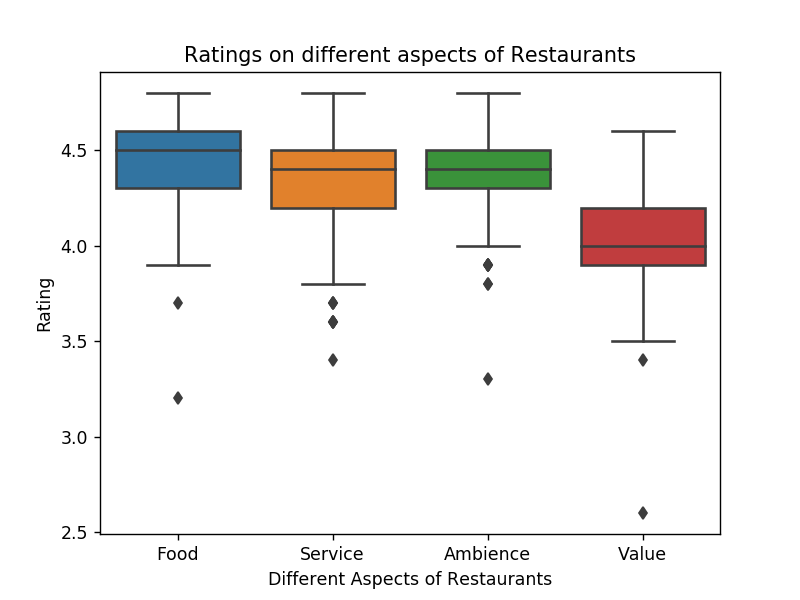

Text(0.5, 1.0, 'Ratings on different aspects of Restaurants')

In [11]:
# Use Seaborn

# Define the type of plot
sns.boxplot(data=data_to_plot)

# Create tick marks
tick_marks = np.arange(len(data_to_plot))

# Define ticks
plt.xticks(tick_marks,['Food', 'Service', 'Ambience', 'Value'])

# Define labels for X-axis and Y-axis 
plt.ylabel('Rating')
plt.xlabel('Different Aspects of Restaurants')

# Define plot title.
plt.title('Ratings on different aspects of Restaurants')


**Results:**
- 1. In the above plot, the vertical axis shows the ratings and and the horizontal axis shows four different aspects of the restaurants, they are food, service, ambience and value.
- 2. The graph shows that the medium value of food is the highest. Service and ambience appear to have similar centres, which exceed the that of restaurant value. Ambience appears to have less variability than the other three. There are few outliers below the minimum in each of four aspects. 

------------------------------------
### 3.8 Display Horizontal Bar Plot for Restaurant Types

In [12]:
# Create a new dataset includes restaurant types and their counts.
type_restaurant = df.restaurant_main_type.value_counts().sort_values()

<IPython.core.display.Javascript object>


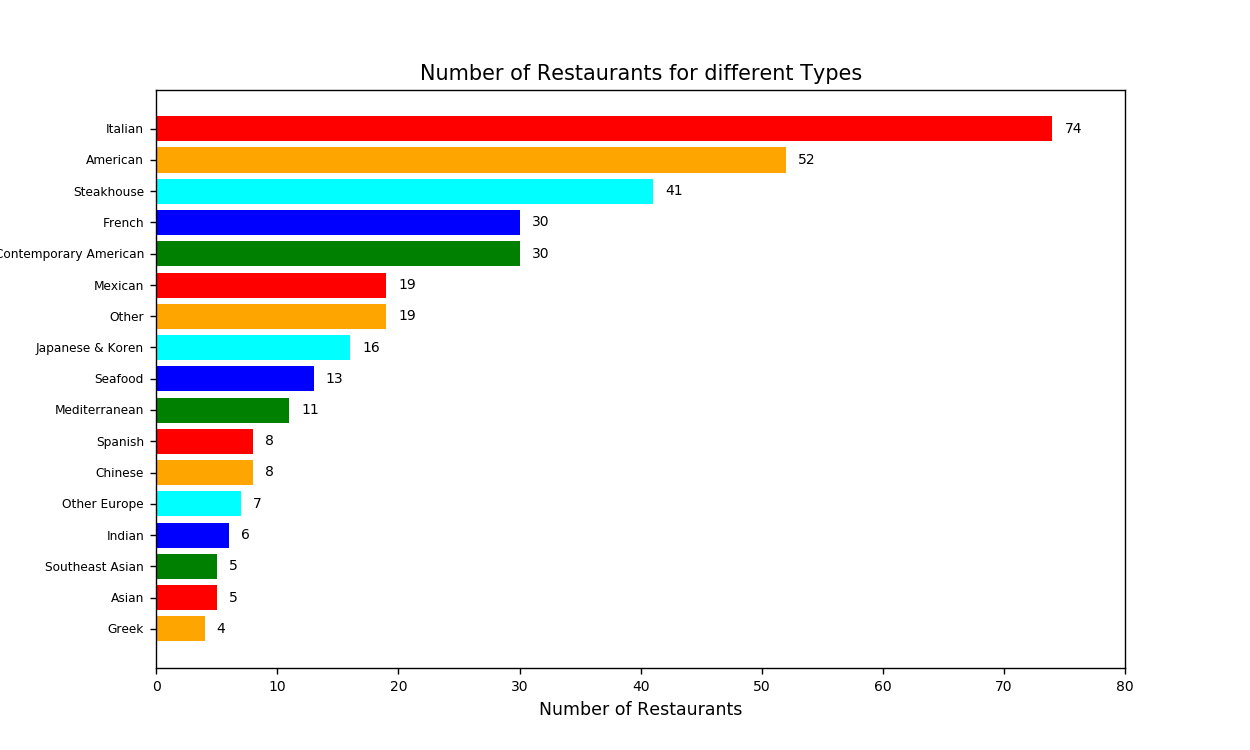

In [13]:
# Use Matplotlib

# Define a new figure
plt.figure(figsize=(10,6))

# Define bars and colors
plt.barh(type_restaurant.index, type_restaurant.values, color=['orange', 'red', 'green', 'blue', 'cyan'])

# Define labels for x-axis and y-axis 
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type',fontsize=6)

# Define a title for the plot: gets displayed at the top
plt.title('Number of Restaurants for different Types')

# Set the x-axis limits  
plt.xlim(0,80)

# Define ticks font size
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)

# Add the text =total number to the axes
for i in type_restaurant.index:
    plt.text(type_restaurant[i]+1,list(type_restaurant.index).index(i),type_restaurant[i], ha='left',va='center',fontsize=8)
    

<IPython.core.display.Javascript object>


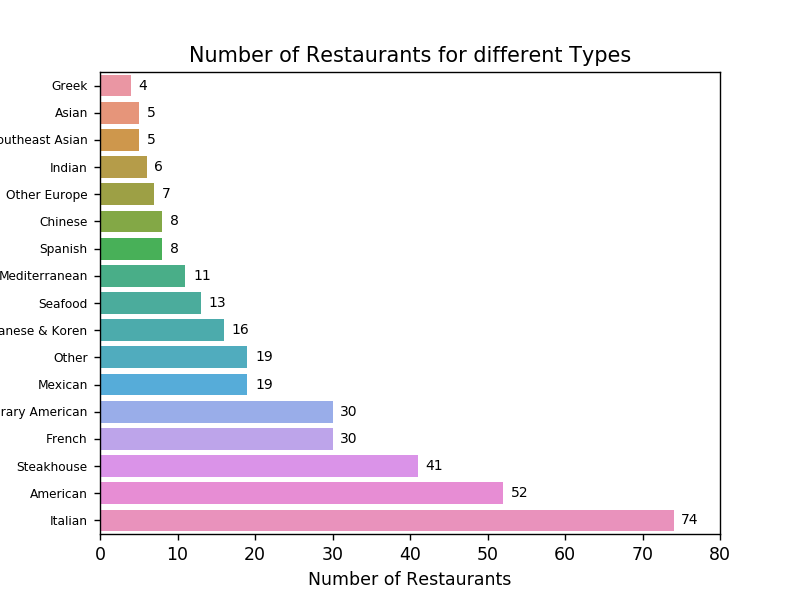

In [14]:
# Use Seaborn

# Sort type_restaurant in descending order
#type_restaurant02 = type_restaurant.sort_values(ascending=False)

# Define the type of plot
sns.barplot(type_restaurant.values,type_restaurant.index,orient='h')

# Define labels for x-axis and y-axis 
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type',fontsize=6)

# Define a title for the plot: gets displayed at the top
plt.title('Number of Restaurants for different Types')

# Set the x-axis limits  
plt.xlim(0,80)

# Define ticks font size
plt.yticks(fontsize=7)

# Add the text =total number to the axes
for i in type_restaurant.index:
    plt.text(type_restaurant[i]+1,list(type_restaurant.index).index(i),type_restaurant[i], ha='left',va='center',fontsize=8)
    

**Results:**
- 1. The top 5 types of partcipating restaurants are Italian, American, Steakhouse, French, and Contempary American. 
- 2. There are only 4 Greek restaurants participating in the restaurant week event in 2018. 

------------------------------
### 3.9 Scatter Plot for the total number of restaurant reviews

In [15]:
# Create y-axis: how many reviews for each restaurant
reviews = df['review_count']

#Create x-axis = each restaurant
x = np.arange(len(df['review_count']))

<IPython.core.display.Javascript object>


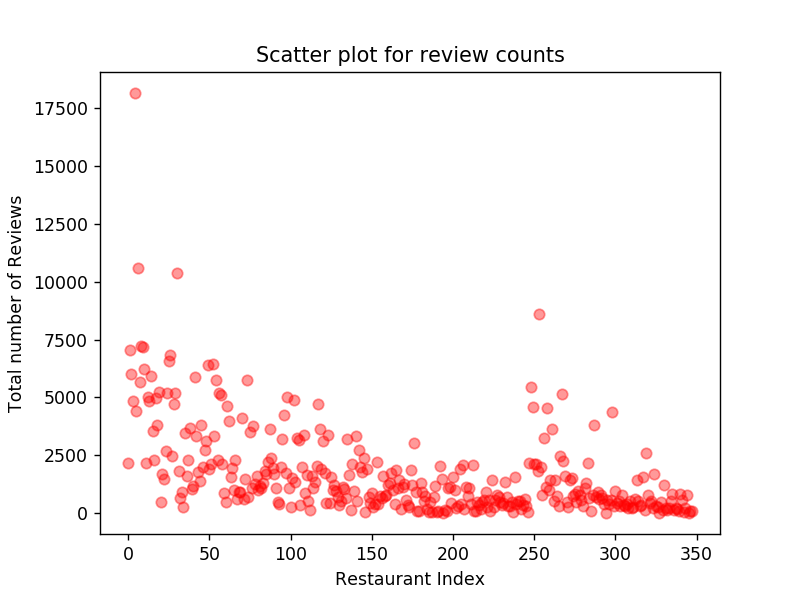

Text(0, 0.5, 'Total number of Reviews')

In [17]:
# Use Matplotlib 
# Define the type of plot
plt.scatter(x, reviews, color='red', alpha=0.4)            
# Define a title for the plot: gets displayed at the top            
plt.title('Scatter plot for review counts')            
# Define labels for x-axis and y-axis 
plt.xlabel('Restaurant Index')
plt.ylabel('Total number of Reviews')

<IPython.core.display.Javascript object>


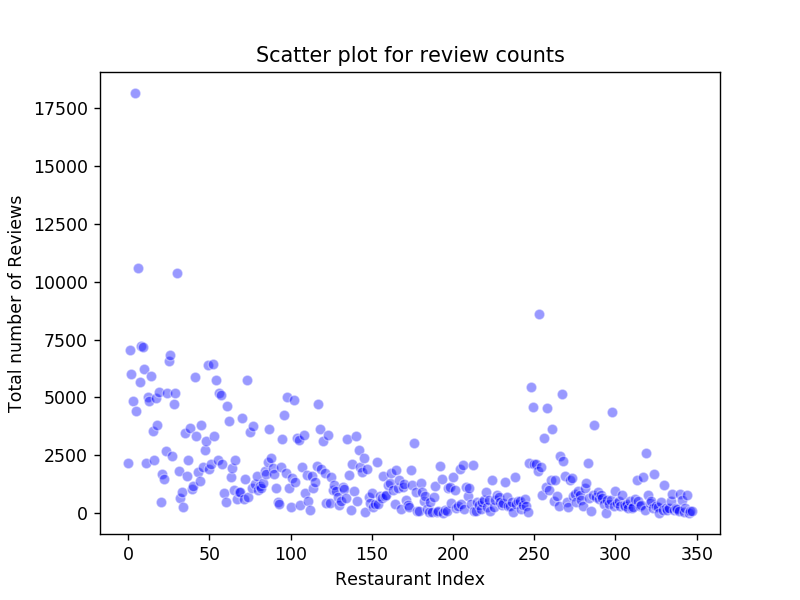

Text(0, 0.5, 'Total number of Reviews')

In [18]:
# Use Seaborn 
# Define the type of plot
sns.scatterplot(x, reviews, color='blue', alpha=0.4)

# Define a title for the plot: gets displayed at the top            
plt.title('Scatter plot for review counts')
            
# Define labels for x-axis and y-axis 
plt.xlabel('Restaurant Index')
plt.ylabel('Total number of Reviews')

In [19]:
# Pull info of the restaurant with the most reviews
df.sort_values(by='review_count',ascending=False).head(1)


,name,street_address,google_map,review_count,phone,website,food_review,service_review,ambience_review,value_review,price_range,star_1,star_2,star_3,star_4,star_5,description,restaurant_main_type,postal_code,positive_rating
4,Becco,"355 West 46th Street New York, NY 10010",//www.google.com/maps/search/?api=1&query=40.7...,18139,(212) 397-7597,http://www.becco-nyc.com/,4.4,4.4,4.1,4.3,$30 and under,1,3,9,27,60,Lidia Bastianich & her son Joe's Theater Distr...,Italian,10010.0,87


**Results:**
1. The scatter plot above shows the total number of reviews for each partcipating restaurant. It also shows the popularity of a restaurant.
2. Most of the restaurants received 0-2500 reviews. There is one restaurant receiving over 1,7500 reviews, the name of this restaurant is Becco.

--------------------------------------
### 3.10 Display Histogram for positive rating


<IPython.core.display.Javascript object>


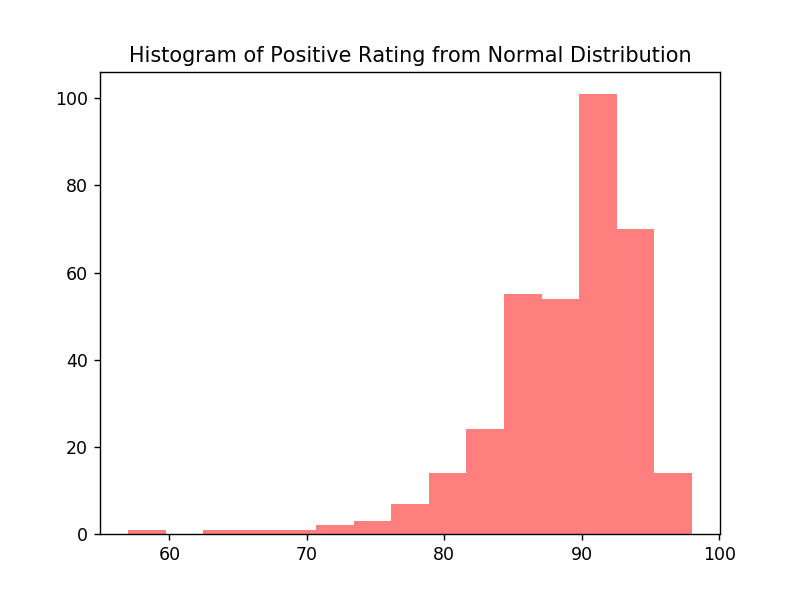

Text(0.5, 1.0, 'Histogram of Positive Rating from Normal Distribution')

In [20]:
# Use Matplotlib
# plot a histogram
plt.hist(df['positive_rating'],color='red',bins=15,alpha=0.5)

# Define a title for the plot: gets displayed at the top            
plt.title('Histogram of Positive Rating from Normal Distribution')


<IPython.core.display.Javascript object>


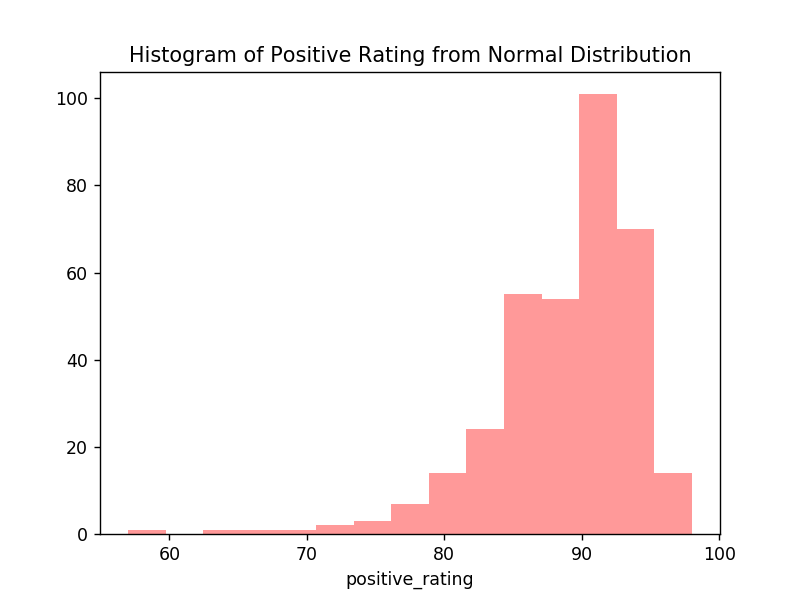

Text(0.5, 1.0, 'Histogram of Positive Rating from Normal Distribution')

In [21]:
# Use Seaborn
# plot a histogram
sns.distplot(df['positive_rating'],bins=15,color='red',kde=False)

# Define a title for the plot: gets displayed at the top            
plt.title('Histogram of Positive Rating from Normal Distribution')


**Results:**
- 1. From the above plot, the positive rating variable has a skewed left distribution. 
- 2. Most restaurants receive 80% and above of positive rating on the overall reviews of restaurants, with fewer restaurants receiving low percentage of positive rating.


-----------------------------
## Part 4: Inference

## Research Question 1: 
### * Which restaurants are reservation-worthy during NYC Restaurant Week Event?

We'll give three recommendations from three most popular main types of restaurant with the best value for customers to taste in New York Restaurant Week event.
We'll do data analysis step by step as follows:
- Step 1. First, we need to identify the three most popular types of restaurants. Since we are going to give suggestions to all customers, we'll consider all the review records here to determine the most popular types of restaurants. We'll use 'review_count' in the whole database 'df' to find it.
- Step 2. For each selected type, we'll select the highest price range. During the NYC Restaurant Week, all restaurants charge the same price for lunch and for dinner. People get the chance to eat at the best NYC restaurants with a lower cost. Therefore, we'll focus on the restaurants that usually cost in the highest price range.
- Step 3. Apply 'positive_rating' and 'review_count', to figure out three restaurants with most values in each type of restaurant.

###  Step 1. Identify three most popular types of restaurant based on 'review_count'.

<IPython.core.display.Javascript object>


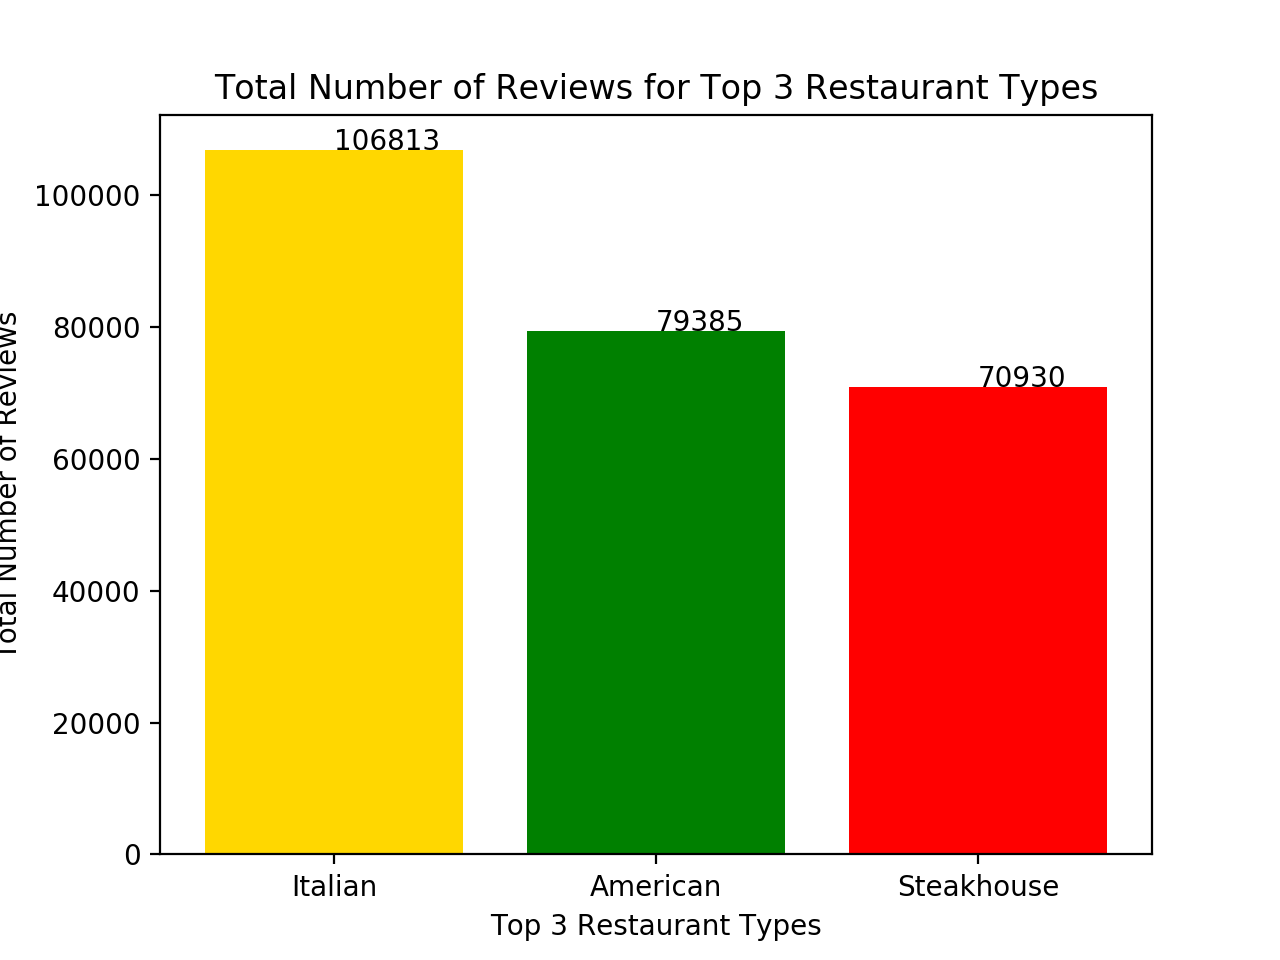

In [7]:
# create a new dataframe t1 with columns including 'name', 'restaurant_main_type', 'price_range', 'review_count', 
# 'positive_rating'.
t1 = df[['name', 'restaurant_main_type', 'price_range', 'review_count', 'positive_rating']]

# figure out top three most popular main types of restaurant.
t1_rank3 = t1.groupby('restaurant_main_type').review_count.sum().sort_values(ascending = False).head(3)

# Use Matplotlib

# Set figure size
plt.figure(1)

# Create bars
plt.bar(t1_rank3.index, t1_rank3, color=['gold', 'green', 'red'])

# Create labels for Y-axis and X-axis
plt.xlabel('Top 3 Restaurant Types')
plt.ylabel('Total Number of Reviews')

# Create barplot title
plt.title('Total Number of Reviews for Top 3 Restaurant Types')

# Add the text =total number to the axes
for i in t1_rank3.index:
    plt.text(list(t1_rank3.index).index(i),t1_rank3[i]+1,t1_rank3[i])

<IPython.core.display.Javascript object>


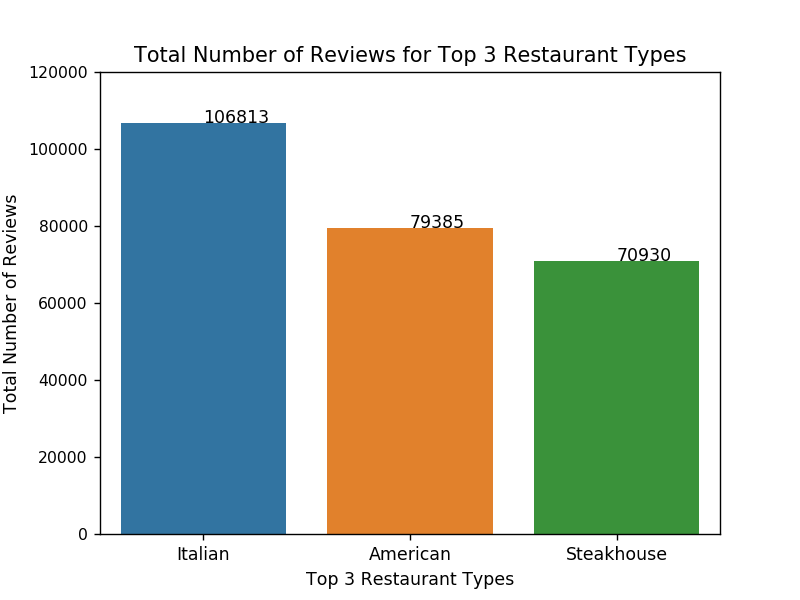

In [23]:
# Use Seaborn

# Define the type of plot
sns.barplot(t1_rank3.index, t1_rank3.values)

# Define labels for x-axis and y-axis 
plt.xlabel('Top 3 Restaurant Types')
plt.ylabel('Total Number of Reviews')

# Set the y-axis limits  
plt.ylim(0,120000)

# Define ticks font size
plt.yticks(fontsize=9)

# Define a title for the plot: gets displayed at the top
plt.title('Total Number of Reviews for Top 3 Restaurant Types')

# Add the text =total number to the axes
for i in t1_rank3.index:
    plt.text(list(t1_rank3.index).index(i),t1_rank3[i]+1,t1_rank3[i])

#### Results:
1. Bsed on the customers' reviews, they are most interested in Italian, American, and Steakhouse restaurants.
2. Italian, American, and Steakhouse restaurants are most popular, having a total of 10,6813, 7,9385, and 7,0930 reviews respectively.



### Step 2. In each selected category, find out the restaurant names with the price located in the highest price range, $50 and over. Show the distribution of review numbers and positive ratings through boxplots.

In [8]:
# create dataframe t1_top3 confining 'restaurant_main_type' to 'Italian', 'American', and 'Steakhouse'.
t1_top3 = t1[(t1['restaurant_main_type'] == 'Italian') |
             (t1['restaurant_main_type'] == 'American') |
             (t1['restaurant_main_type'] =='Steakhouse')]

# create a dataset containing 'Italian', 'American', and 'Steakhouse' restaurants with price range of '$50 and over'.
t1_top3_50 = t1_top3[(t1_top3['price_range'] == '$50 and over')]

#### The distribution of review numbers

<IPython.core.display.Javascript object>


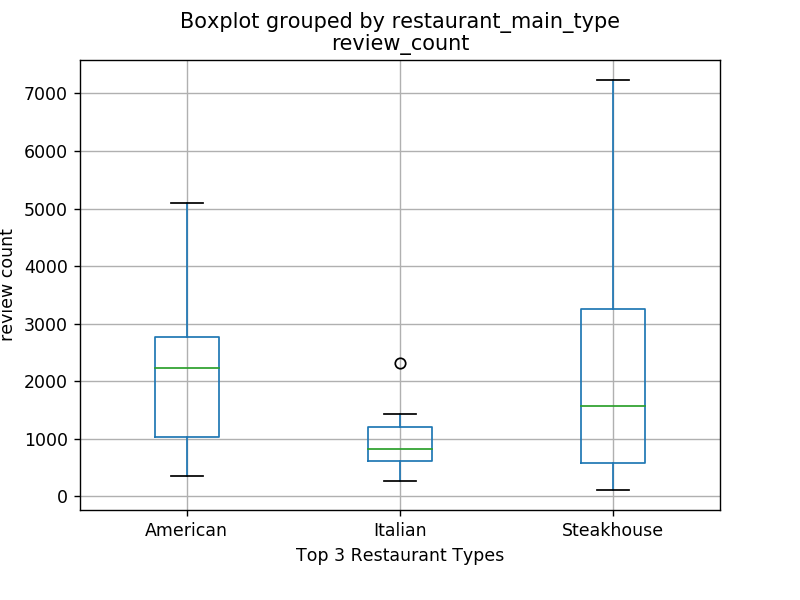

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]), <a list of 10 Text yticklabel objects>)

In [26]:
# Use Matplotlib

# Use boxplots to show the 'review count'.
t1_top3_50.boxplot(by="restaurant_main_type", column="review_count")

# Define labels for x-axis and y-axis 
plt.xlabel('Top 3 Restaurant Types')
plt.ylabel('review count')

# Define ticks font size
plt.yticks(fontsize=10)


<IPython.core.display.Javascript object>


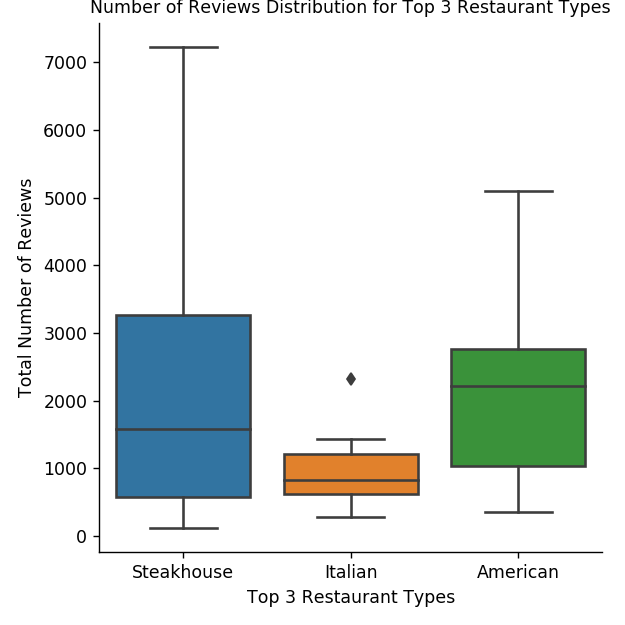

Text(0.5, 1.0, 'Number of Reviews Distribution for Top 3 Restaurant Types')

In [27]:
# Use Seaborn

# Use boxplots to show the 'review_count'.
sns.catplot(x='restaurant_main_type', y='review_count', kind='box',
               data=t1_top3_50)

# Define labels for x-axis and y-axis 
plt.xlabel('Top 3 Restaurant Types')
plt.ylabel('Total Number of Reviews')

# Define a title for the plot: gets displayed at the top
plt.title('Number of Reviews Distribution for Top 3 Restaurant Types', fontsize=10)

#### Results:
1. In the '$50 and over' price range, most Italian high price restaurants have reviews less than 1500. In addition, an outlier catches our eyes with reviews of about 2200.
2. Steakhouse restaurants have the largest distribution range in the three types. The average review number is in the middle of the three.
3. American restaurants' average review number is the biggest one among the three.

#### The distribution of positive ratings.

<IPython.core.display.Javascript object>


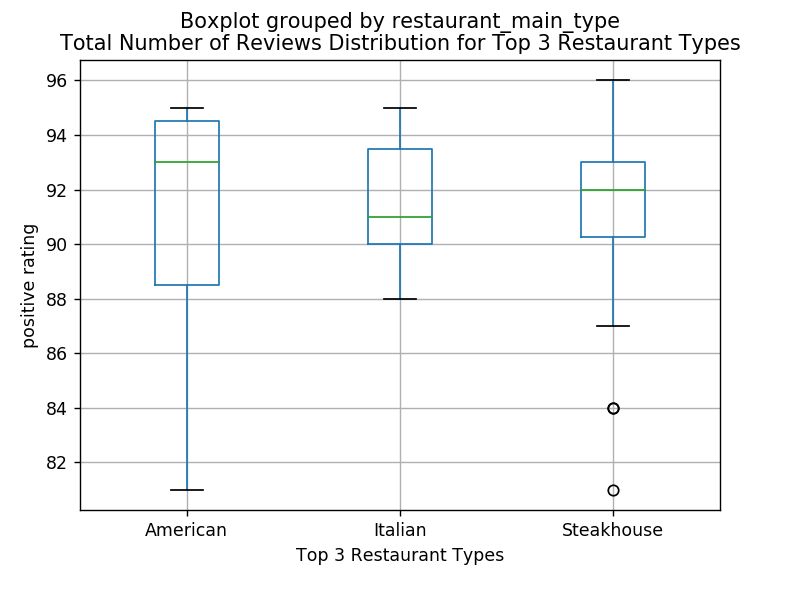

Text(0.5, 1.0, 'Total Number of Reviews Distribution for Top 3 Restaurant Types')

In [28]:
# Use Matplotlib
# Use boxplots to show the 'positive_rating'.
t1_top3_50.boxplot(by="restaurant_main_type", column="positive_rating")

# Define labels for x-axis and y-axis 
plt.xlabel('Top 3 Restaurant Types')
plt.ylabel('positive rating')

# Define a title for the plot: gets displayed at the top
plt.title('Total Number of Reviews Distribution for Top 3 Restaurant Types')

<IPython.core.display.Javascript object>


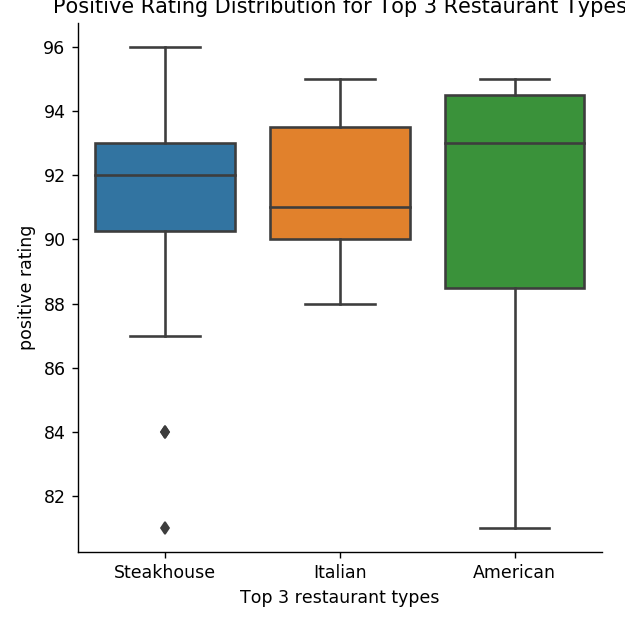

Text(0.5, 1.0, 'Positive Rating Distribution for Top 3 Restaurant Types')

In [29]:
# Use Seaborn
# Use boxplots to show the 'positive_rating'.
sns.catplot(x='restaurant_main_type', y='positive_rating', kind='box',
               data=t1_top3_50)

# Define labels for x-axis and y-axis 
plt.xlabel('Top 3 restaurant types')
plt.ylabel('positive rating')

# Define a title for the plot: gets displayed at the top
plt.title('Positive Rating Distribution for Top 3 Restaurant Types')

#### Results:
1. American restaurant has the widest range from the 'minimum' to 'maximum'. And it has the highest average positive rating, about 93. The distribution is left-skewed.
2. The data in Italian is the closest together among the three types.
3. Steakhouse positive rating distribution figure has two outliers less than the 'minimum'.

### Step 3. Apply 'positive_rating' and 'review_count', to figure out three restaurants with most values in each catogery of Steakhouse, Italian, and American.

#### (1) Steakhouse

In [30]:
# Steakhouse of top five most review counts.
t1_top3_50[t1_top3_50['restaurant_main_type'] == 'Steakhouse'][['name','review_count','positive_rating']].sort_values(by='review_count', ascending = False).head(5)

,name,review_count,positive_rating
8,Del Frisco's Double Eagle Steak House - New Yo...,7225,92
49,Smith & Wollensky - New York,6405,87
12,Gallaghers Steakhouse - Manhattan,5020,93
287,Delmonico's,3792,93
75,The Capital Grille - NY – Chrysler Center,3491,95


In [31]:
# Steakhouse of top five highest positive rating.
t1_top3_50[t1_top3_50['restaurant_main_type'] == 'Steakhouse'][['name','review_count','positive_rating']].sort_values(by='positive_rating', ascending = False).head(5)

,name,review_count,positive_rating
335,MarkJoseph Steakhouse,814,96
75,The Capital Grille - NY – Chrysler Center,3491,95
214,Bob's Steak & Chop House-New York,117,95
154,Royal 35 Steakhouse,411,94
12,Gallaghers Steakhouse - Manhattan,5020,93


#### Results:
* No.8 Del Frisco's Double Eagle Steak House has the most review count and its positive_rating is 92 which is still high.
* No.12 Gallaghers Steakhouse has 5020 review count which is the third highest value, and owns a positive_rating of 93.
* No.75 The Capital Grille - NY – Chrysler Center has the second highest positive_rating, and its review count is 3491, which is number 5 in the list.
-------------
#### (2) Italian
In order to save some pages, I will not show the same data manipulation on the Italian restaurants and American ones, but only to give the results.

#### Results:
* No.275 II Mulino New York - Downtown has the highest positive rating of 95.
* No.37 Lavo - NYC has an extraordinary review number of 2317, 1000 more reviews than the second one. In addition, its positive rating is 91.
* No.272 II Cantinori has a second highest positive rating, and fourth most review numbers.
----------------
#### (3) American
#### Results:
* No.104 21 Club has the third highest positive rating and second most review number.
* No.57 Craft has the most review number and the fourth highest positive rating.
* No.268 Hearth has the highest positive rating and the third most review number.
------------
### Conclusion:
Give a recommendation list of three most popular restautants, 'rec_list'.


In [12]:
rec_list = pd.DataFrame(df, columns=['restaurant_main_type', 'name',  'street_address', 'phone'],
                   index=[275,37,272,104,57,268,8,12,75])
rec_list

,restaurant_main_type,name,street_address,phone
275,Italian,Il Mulino New York - Downtown,"86 West 3rd Street New York, NY 10012",(212) 673-3783
37,Italian,Lavo - NYC,"39 East 58th Street New York, NY 10022",(212) 750-5588
272,Italian,Il Cantinori,"32 East 10th Street New York, NY 10003",(212) 673-6044
104,American,21 Club,"21 West 52nd Street New York, NY 10019",(212) 582-7200
57,American,Craft,"43 E. 19th St. New York, NY 10003",(212) 780-0880
268,American,Hearth,"403 East 12 Street New York, NY 10009",(646) 602-1300
8,Steakhouse,Del Frisco's Double Eagle Steak House - New Yo...,"1221 Avenue of the Americas New York, NY 10020",(212) 575-5129
12,Steakhouse,Gallaghers Steakhouse - Manhattan,"228 West 52nd Street New York, NY 10019",(212) 586-5000
75,Steakhouse,The Capital Grille - NY – Chrysler Center,155 E 42nd Street Located in the Trylon Towers...,(212) 953-2000


---------------------------------
## Research Question 2: 
### * Which factors affect the positive rating on OpenTable?

First of all, we'll create a new dataset called **'df_new'** that includes the required columns/variableas only. We'll use the corr() function returns the correlation between all the numeric columns of the dataset. A correlation will be computed to determine the relationship between independent variables and dependent variable. For the purpose of this question, there are 5 independent variables, which are 'review_count', 'food_review', 'service_review', 'ambience_review', 'value_review'; and there is one dependent variable - 'positive_rating'. 


<IPython.core.display.Javascript object>


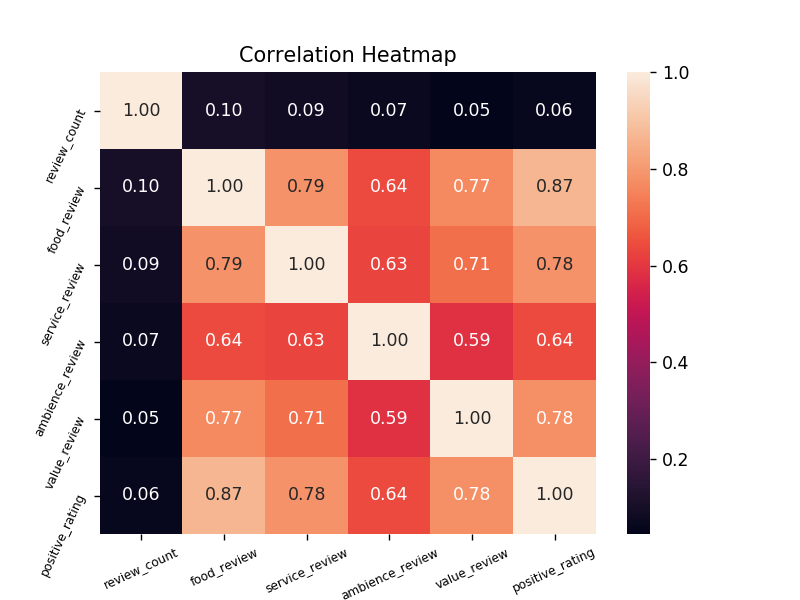

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

In [36]:
# Use Seaborn

# Which factors affect the positive ratings on OpenTable?
df_new = df[['review_count','food_review','service_review','ambience_review','value_review','positive_rating']]

# Use Seaborn
# Define the type of plot
sns.heatmap(df_new.corr(), annot=True, fmt=".2f")

# Define a title for the plot: gets displayed at the top            
plt.title('Correlation Heatmap')
            
# Define ticks font size
plt.yticks(fontsize=7,rotation=65)
plt.xticks(fontsize=7,rotation=25)


<IPython.core.display.Javascript object>


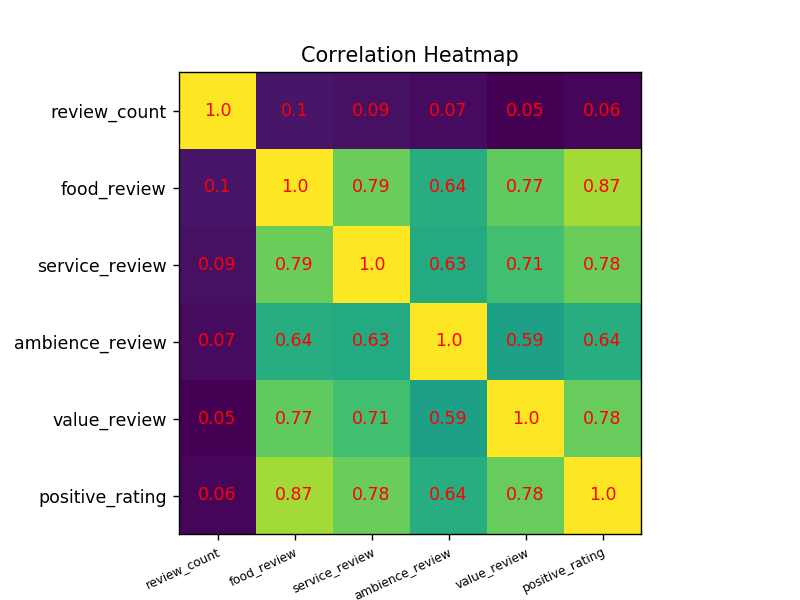

In [38]:
# Use Matplotlib

# get correlation matrix
corr = df_new.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Define a title for the plot: gets displayed at the top            
plt.title('Correlation Heatmap')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=25, fontsize=7,ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="red")


#Reference: https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

**Results:**
- In the above correlation plot, we get 6 rows and 6 columns – one of each for each variable. The values show the correlation score between the row and column at each point. Values range from 1 (very strong positve correlation) to -1 (very strong negative correlation), 0 (no relationship). The correlation score is also called as R-squared. R-squared is an indicator of the strength of the relationship between variables.

- The color of the box depends upon the value. In the above plot, if there is a high correlation between two features, the corresponding cell is white, on the other hand if there is no correlation, the corresponding cell remains black.

- The R-squared between food review and positive rating, service review and positive rating, ambience review and positive rating, value review and positive review are higher than 0.6, suggesting a strong positive relationship.
- The R-squared between review count and positive rating is 0.06, suggesting a weak positive relationship.









-------
## Part 5: Conclusion


The purpose of this study is to examine reviews on NYC restaurant week event in 2018. There are two research questions that guide this research. They are: 1. Which restaurants are reservation-worthy during NYC restaurant week event? 2. Which factors affect the positive rating on OpenTable?

The sample of this study consists of 348 unique rows and 23 columns (variables) that show the information of each participating restaurant on OpenTable.

<u>The range of price:</u>

During restaurant week event, we pay \\$26 for lunch and \\$42 for dinner. In the participating restaurants, there are 230 restaurants that we usually need to pay \\$31-$50 per person to eat at. A total of 65 restaurants cost \\$50 and over, and 53 restaurants cost \\$30 and under to eat at with the regular menu price.

<u>Ratings on different aspects of restaurants:</u>

For the ratings on food, service, ambience and value, we found that the value is rated lower than other three aspects. These four aspects are used to measure customer satisfaction. That means people are not completely satisfied with the value to eat here.

<u>Restaurant type:</u>

For the restaurant type, the top 3 types are Italian, American, and Steakhouse during the event. Therefore, people will have more restaurant options to choose from these 3 types.

<u>Review counts:</u>

People usually use review counts to see the popularity of a restaurant. In this study, most of the participating restaurants receive 2500 reviews and below. There’s one restaurant that is extremely popular and receives 1,7500 reviews on OpenTable. The restaurant’s name is Becco. It is an Italian restaurant with the price range at $30 and under per person.

<u>Positive rating:</u>

Most of the participating restaurants get at least 80% of positive rating on the overall reviews of restaurants. Overall, 80% and above of people had positive dining experience in these participating restaurants. 

<u>Research Question #1:</u>
Which restaurants are reservation-worthy during NYC Restaurant Week Event?

We generate a list of recommendations that are reservation-worthy during NYC Restaurant Week Event. They are:

In [13]:
rec_list

,restaurant_main_type,name,street_address,phone
275,Italian,Il Mulino New York - Downtown,"86 West 3rd Street New York, NY 10012",(212) 673-3783
37,Italian,Lavo - NYC,"39 East 58th Street New York, NY 10022",(212) 750-5588
272,Italian,Il Cantinori,"32 East 10th Street New York, NY 10003",(212) 673-6044
104,American,21 Club,"21 West 52nd Street New York, NY 10019",(212) 582-7200
57,American,Craft,"43 E. 19th St. New York, NY 10003",(212) 780-0880
268,American,Hearth,"403 East 12 Street New York, NY 10009",(646) 602-1300
8,Steakhouse,Del Frisco's Double Eagle Steak House - New Yo...,"1221 Avenue of the Americas New York, NY 10020",(212) 575-5129
12,Steakhouse,Gallaghers Steakhouse - Manhattan,"228 West 52nd Street New York, NY 10019",(212) 586-5000
75,Steakhouse,The Capital Grille - NY – Chrysler Center,155 E 42nd Street Located in the Trylon Towers...,(212) 953-2000


--------
<u>Research Question #2:</u> Which factors affect the positive ratings on OpenTable?

From the results of the correlation plot, we found that food ratings, service ratings, ambience ratings, and value rataings have strong positive relationships with the positive ratings on OpenTable. However, the popularity (review counts) has a weak correlation with the positive ratings.